In [36]:
import numpy as np
import matplotlib.pyplot as plt
import bh_potential as bh
import time

### Define a test distribution 

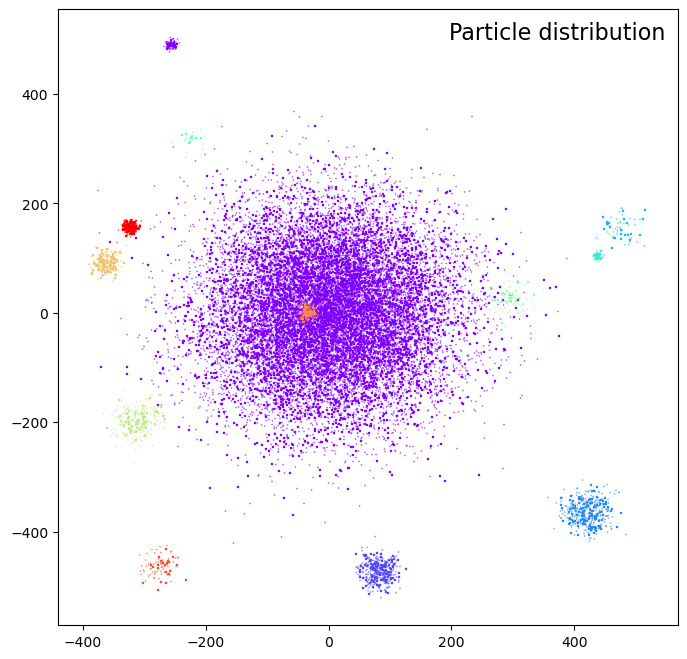

In [37]:
# Generate a test distribution
np.random.seed(10)
masses, positions, cluster_n = bh.generate_test_distribution(N_pot_main=25000)

# Plot the particle positions with a different colour for each cluster
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(positions[:, 0], positions[:, 1], c=cluster_n, marker=',', s=0.1, cmap='rainbow');
ax.text(0.98, 0.98, 'Particle distribution', transform=ax.transAxes,
            fontsize=16, va='top', ha='right');

### Build the octree

built tree using 28168 particles in 0.2 seconds


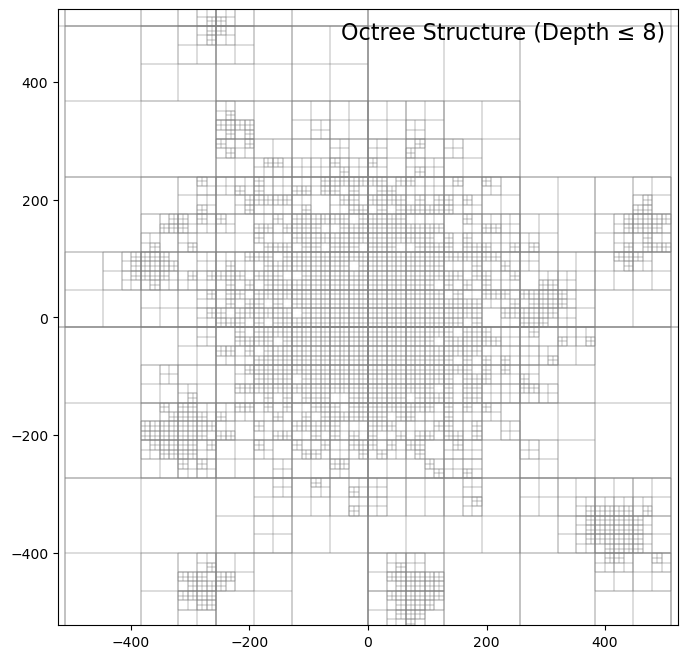

In [38]:
t0 = time.time()
octree = bh.Octree(positions, masses) # Build the octree
t1 = time.time()

print('built tree using %i particles in %0.1f seconds' % (len(positions), t1-t0))

octree.plot_octree_slice() # Plot the octree structure

### Evaluating the value of the potential at a grid of points

evaluated potential for 10000 positions in 0.1 seconds


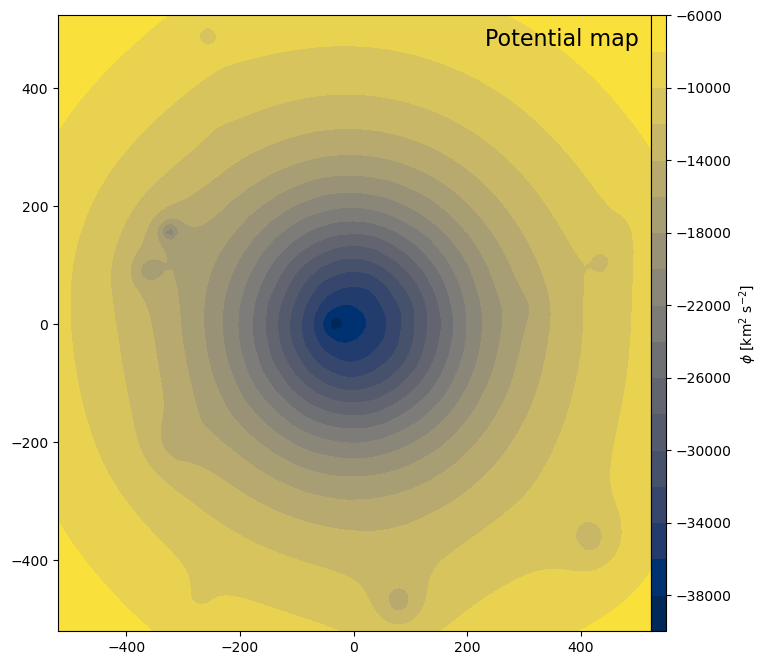

In [39]:
# Create a regular 2-d grid to evaluate the potential
num_points = 100  # Number of points along each axis for the grid
x_grid = y_grid = np.linspace(np.min(positions), np.max(positions), num_points)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
test_positions = np.vstack([x_mesh.ravel(), y_mesh.ravel(), np.zeros_like(x_mesh.ravel())]).T

t0 = time.time()
test_potentials = octree.compute_potentials(test_positions) # Now evaluate the potential at the these positions
t1 = time.time()
print('evaluated potential for %i positions in %0.1f seconds' % (len(test_positions), t1-t0))

# Plot the values of the potential as contours
fig, ax = plt.subplots(figsize=(9, 8))

potential_map = test_potentials.reshape(x_mesh.shape)
c = ax.contourf(x_mesh, y_mesh, potential_map, 20, cmap='cividis')
fig.colorbar(c, ax=ax, label='$\phi$ [km$^{2}$ s$^{-2}$]', pad=0, aspect=40)
ax.text(0.98, 0.98, 'Potential map', transform=ax.transAxes,
            fontsize=16, va='top', ha='right');

### Evaluating the potential at each particle position

evaluated potential for 28168 positions in 0.6 seconds


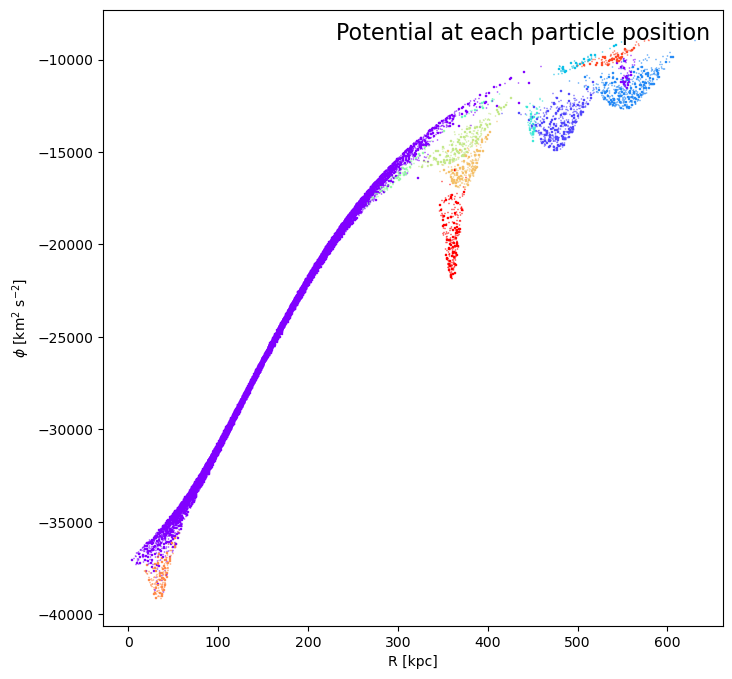

In [40]:
t0 = time.time()
potentials = octree.compute_potentials(positions) # Evaluate the potential at the position of each particle
t1 = time.time()
print('evaluated potential for %i positions in %0.1f seconds' % (len(positions), t1-t0))

# Sort by radius
r = np.sqrt(np.sum(positions**2, axis=1))
s = np.argsort(r)

# Plot the value of the potential against radius
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(r[s], potentials[s], c=cluster_n[s], marker=',', s=0.1, cmap='rainbow');
ax.set_xlabel('R [kpc]')
ax.set_ylabel('$\phi$ [km$^{2}$ s$^{-2}$]');
ax.text(0.98, 0.98, 'Potential at each particle position', transform=ax.transAxes,
            fontsize=16, va='top', ha='right');